In [1]:
import json
from collections import Counter
import pandas as pd

In [2]:
# Read File

file_name = "MELD_train_efr.json"
with open(file_name, 'r') as file:
        dataset = json.load(file)

In [3]:
# Number of episodes in dataset

N = len(dataset)
print(N)

4000


In [4]:
# Sample Episode

dataset[0]

{'episode': 'utterance_0',
 'speakers': ['Chandler',
  'The Interviewer',
  'Chandler',
  'The Interviewer',
  'Chandler'],
 'emotions': ['neutral', 'neutral', 'neutral', 'neutral', 'surprise'],
 'utterances': ["also I was the point person on my company's transition from the KL-5 to GR-6 system.",
  "You must've had your hands full.",
  'That I did. That I did.',
  "So let's talk a little bit about your duties.",
  'My duties?  All right.'],
 'triggers': [0.0, 0.0, 0.0, 1.0, 0.0]}

In [5]:
# Emotion Flip Analysis

# Read File

file_name = "MELD_train_efr.json"
with open(file_name, 'r') as file:
        dataset = json.load(file)

# Reading the data

episodes_list = []
speakers_list = []
utterances_list = []
triggers_list = []
emotions_list = []

for i in range(len(dataset)):
        episodes_list.append(dataset[i]['episode'])
        speakers_list.append(dataset[i]['speakers'])
        utterances_list.append(dataset[i]['utterances'])
        triggers_list.append(dataset[i]['triggers'])
        emotions_list.append(dataset[i]['emotions'])  

N = len(dataset)   

data = [[],[],[],[],[]]
# prev_first_sen = utterances_list[0][0]
d_id = -1
for i in range(N):
    if i==N-1 or utterances_list[i][0]!=utterances_list[i+1][0]:
        d_id+=1
        # if i!=N-1:
        #         prev_first_sen = utterances_list[i+1][0]
        data_temp = [[],[],[],[],[]]
        
        for j in range(len(utterances_list[i])):
            data_temp[0].append(d_id)
            data_temp[1].append(speakers_list[i][j])
            data_temp[2].append(emotions_list[i][j])
            data_temp[3].append(utterances_list[i][j])
            data_temp[4].append(triggers_list[i][j])
        
        data[0].append(data_temp[0])
        data[1].append(data_temp[1])
        data[2].append(data_temp[2])
        data[3].append(data_temp[3])
        data[4].append(data_temp[4])
                       
speakers_list_uq = data[1]
emotions_list_uq = data[2]
utterances_list_uq = data[3]
triggers_list_uq = data[4]

N_uq = len(utterances_list_uq)

In [6]:
print(N)
print(N_uq)

4000
833


In [7]:
# Speaker Data Analysis

# Data Processing
speakers_data_uq = [None] * N_uq

for i in range(N_uq):
    c_uq = Counter()
    c_uq.update(speakers_list_uq[i])
    speakers_data_uq[i] = c_uq.items()

# Finding Average
instance_count_uq = 0
total_count_uq = 0
for i in range(N_uq):
    for person, utt_count in speakers_data_uq[i]:
        total_count_uq += utt_count
        instance_count_uq += 1

print("Total Utterances ", total_count_uq)
avg_utt_per_person_uq = total_count_uq / instance_count_uq
print("Average Number of Utterances one person performs in an episode is {:.2f}".format( avg_utt_per_person_uq))

# Speaker Count Data Analysis
person_count_uq = 0
for i in range(N_uq):
    for person, utt_count in speakers_data_uq[i]:
        person_count_uq += 1
        
print("Average Number of Speakers in an episode is {:.2f}".format(person_count_uq / N_uq))

Total Utterances  8747
Average Number of Utterances one person performs in an episode is 3.82
Average Number of Speakers in an episode is 2.75


In [8]:
total_count_uq

8747

In [9]:
# Utterance Count Data Analysis
utterances_count_uq = [None] * N_uq

for i in range(N_uq):
    utterances_count_uq[i] = len(utterances_list_uq[i])
   
total_count_uq = 0
for i in range(N_uq):
    total_count_uq += utterances_count_uq[i]
    
print("Average Number of Utterances in an episode is {:.2f}".format(total_count_uq / N_uq))

Average Number of Utterances in an episode is 10.50


In [10]:
# Trigger Count Data Analysis
triggers_count = [None] * N

for i in range(N):
    for j in range(len(triggers_list[i])):
        try:
            triggers_list[i][j] = int(float(triggers_list[i][j]))
        except:
            print(f"Data Error: In episode {i} the utterance {j} has trigger label {triggers_list[i][j]}")  
            triggers_list[i][j] = 0
            
    triggers_count[i] = sum(triggers_list[i])
   
total_count = 0
for i in range(N):
    total_count += triggers_count[i]
    
print("Average Number of triggers in an episode is {:.2f}".format(total_count / N))

Data Error: In episode 2671 the utterance 3 has trigger label nan
Data Error: In episode 2693 the utterance 5 has trigger label nan
Data Error: In episode 3105 the utterance 3 has trigger label nan
Data Error: In episode 3157 the utterance 2 has trigger label nan
Data Error: In episode 3171 the utterance 5 has trigger label nan
Data Error: In episode 3204 the utterance 0 has trigger label nan
Data Error: In episode 3266 the utterance 6 has trigger label nan
Data Error: In episode 3351 the utterance 3 has trigger label nan
Data Error: In episode 3359 the utterance 1 has trigger label nan
Average Number of triggers in an episode is 1.39


In [11]:
# Emotion Count Data Analysis
emotions_data_uq = [None] * N_uq

for i in range(N_uq):
    c_uq = Counter()
    c_uq.update(emotions_list_uq[i])
    emotions_data_uq[i] = c_uq.items()
    
c_uq = Counter()
for i in range(N_uq):
    c_uq.update(emotions_list_uq[i])

for count, label in sorted( ((v,k) for k,v in c_uq.items()), reverse=True):
    print(f"Utterances with label {label} is {count}")

Utterances with label neutral is 3955
Utterances with label joy is 1567
Utterances with label surprise is 1101
Utterances with label anger is 991
Utterances with label sadness is 631
Utterances with label disgust is 254
Utterances with label fear is 248


In [12]:
# Trigger Detailed Analysis

labels = ["neutral", "anger", "surprise", "fear", "joy", "sadness", "disgust", "contempt"]

count_dict = {}
for l in labels:
    count_dict[l] = 0

dist_counter = Counter()

for i in range(N):
    for j in range(len(triggers_list[i])):
        if triggers_list[i][j]==1:
            to_emotion = emotions_list[i][j]
            count_dict[to_emotion] += 1
            dist_counter.update([len(triggers_list[i])-1 - j])
            
for count, label in sorted( ((v,k) for k,v in count_dict.items()), reverse=True):
    print(f"Number of Triggers which had emotion {label} are {count}")

Number of Triggers which had emotion neutral are 2188
Number of Triggers which had emotion joy are 977
Number of Triggers which had emotion anger are 765
Number of Triggers which had emotion surprise are 696
Number of Triggers which had emotion sadness are 526
Number of Triggers which had emotion disgust are 220
Number of Triggers which had emotion fear are 203
Number of Triggers which had emotion contempt are 0


In [13]:
count_dict

{'neutral': 2188,
 'anger': 765,
 'surprise': 696,
 'fear': 203,
 'joy': 977,
 'sadness': 526,
 'disgust': 220,
 'contempt': 0}

c:\Shubham\B-Tech\Study\Academics\Semester_5\CS779\Practical\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


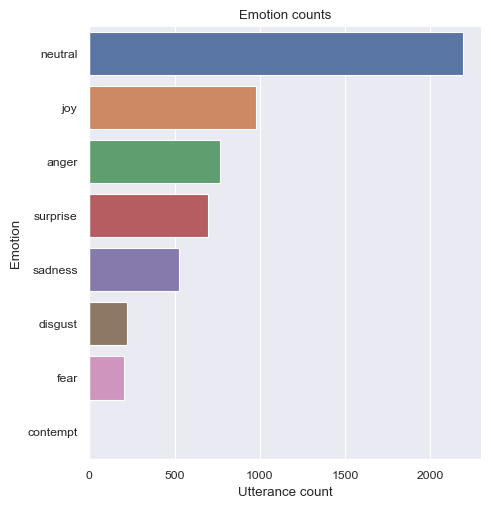

In [14]:
utt_label = pd.DataFrame(columns=['emotion', 'count'], data=count_dict.items())
utt_label = utt_label.rename(columns={'emotion': 'Emotion', 'count': 'Utterance count'})
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme('paper')
sns.catplot(data=utt_label.sort_values(by='Utterance count', ascending=False), kind='bar', y='Emotion', x='Utterance count')\
    .set(title='Emotion counts')
plt.savefig('task2_emotion_counts.svg')

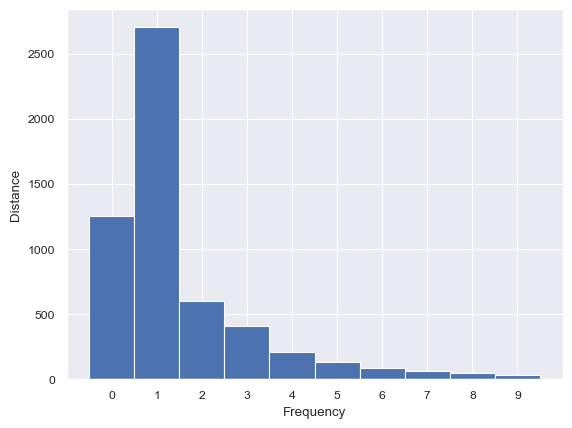

In [15]:
dist_counter

x = dict(dist_counter)

import numpy as np
labels, values = zip(*dist_counter.items())
labels = np.array(labels)
values = np.array(values)
ind = np.argsort(labels)
labels = labels[ind]
values = values[ind]

import matplotlib.pyplot as plt

indexes = np.arange(len(labels[:10]))
width = 1
import seaborn as sns
sns.set_theme('paper')
plt.bar(indexes[:10], values[:10], width)
plt.xticks(indexes)
plt.xlabel("Frequency")
plt.ylabel("Distance")
# plt.show()
plt.savefig('MELD_dist_stats.svg')

In [16]:
labels = ["neutral", "anger", "surprise", "fear", "joy", "sadness", "disgust", "contempt"]

# Defining the variables
is_flip = [None] * N_uq
flip_from_emotion = [None] * N_uq
flip_from_index = [None] * N_uq
flip_to_emotion = [None] * N_uq
flip_to_index = [None] * N_uq
for i in range(N_uq):
    k = len(utterances_list_uq[i])
    is_flip[i] = [0] * k
    flip_from_emotion[i] = [None] * k
    flip_from_index[i] = [None] * k
    flip_to_emotion[i] = [None] * k
    flip_to_index[i] = [None] * k

# Filling the variables
for i in range(N_uq):
    speakers = set(speakers_list_uq[i])
    state_dict = {}
    for sp in speakers:
        state_dict[sp] = (None, None)   # (ix, emotion)
    
    for j in range(len(utterances_list_uq[i])):
        sp = speakers_list_uq[i][j]
        sp_emotion = emotions_list_uq[i][j]
        if state_dict[sp][0]==None:
            state_dict[sp] = (j, sp_emotion)
        else:
            if state_dict[sp][1]!=sp_emotion:
                is_flip[i][j] = 1
                flip_from_emotion[i][j] = state_dict[sp][1]
                flip_from_index[i][j] = state_dict[sp][0]
                flip_to_emotion[i][j] = sp_emotion
                flip_to_index[i][j] = j
            
            state_dict[sp] = (j, sp_emotion)          
            
# Data Analysis
flip_pair_dict = {}
for label1 in labels:
    for label2 in labels:
        flip_pair_dict[(label1, label2)] = [0, 0]
       
dist_counter= Counter()
for i in range(N_uq):
    for j in range(len(utterances_list_uq[i])):
        if is_flip[i][j]==1:
            flip_pair_dict[(flip_from_emotion[i][j], flip_to_emotion[i][j])][0] += 1
            flip_pair_dict[(flip_from_emotion[i][j], flip_to_emotion[i][j])][1] += flip_to_index[i][j] - flip_from_index[i][j]
            dist_counter.update([flip_to_index[i][j] - flip_from_index[i][j]])

# Formatting
from decimal import Decimal, getcontext
getcontext().prec = 3

# Displaying Results
count_result = {}
for label1 in labels:
    count_result[label1] = [0] * len(labels)

for i, label1 in enumerate(labels):
    for j, label2 in enumerate(labels):
        count_result[label1][j] = flip_pair_dict[(label1, label2)][0]
        
dist_result = {}

for label1 in labels:
    dist_result[label1] = [0] * len(labels)

for i, label1 in enumerate(labels):
    for j, label2 in enumerate(labels):
        if flip_pair_dict[(label1, label2)][0]!=0:
            dist_result[label1][j] = Decimal(flip_pair_dict[(label1, label2)][1]) / Decimal(flip_pair_dict[(label1, label2)][0])
        else:
            dist_result[label1][j] = 0

print("Count Statistics")       
print("Row Labels are emotion FLIP FROM EMOTION and Column Labels are FLIP TO EMOTION")
df_count = pd.DataFrame(count_result, pd.Index(labels))
print(df_count)
print("\n\n")
print("Distance between utterances of the flip")
print("Row Labels are emotion FLIP FROM EMOTION and Column Labels are FLIP TO EMOTION")
df_dist = pd.DataFrame(dist_result, pd.Index(labels))
print(df_dist)

Count Statistics
Row Labels are emotion FLIP FROM EMOTION and Column Labels are FLIP TO EMOTION
          neutral  anger  surprise  fear  joy  sadness  disgust  contempt
neutral         0    220       301    62  503      167       58         0
anger         279      0        91    32   66       52       33         0
surprise      357     74         0    20  131       41       20         0
fear           76     16        22     0   33       24        4         0
joy           453     81       142    16    0       51       21         0
sadness       178     67        48    23   62        0        9         0
disgust        62     27        32     5   28       12        0         0
contempt        0      0         0     0    0        0        0         0



Distance between utterances of the flip
Row Labels are emotion FLIP FROM EMOTION and Column Labels are FLIP TO EMOTION
         neutral anger surprise  fear   joy sadness disgust  contempt
neutral        0  2.14     2.57  2.48  2.45   

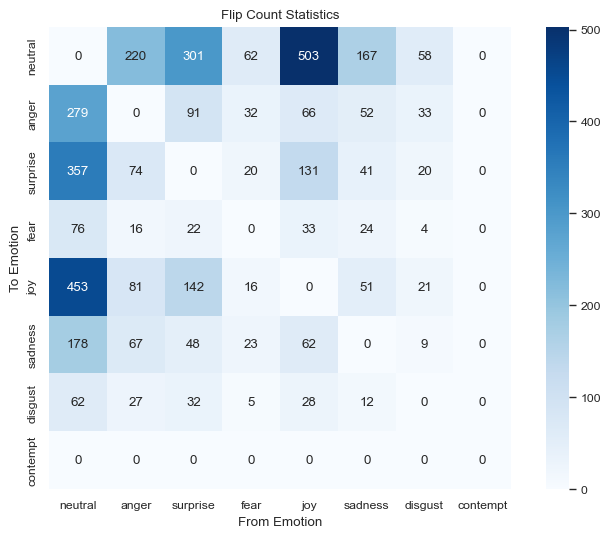

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(9,6))
ax = sns.heatmap(df_count, annot=True, fmt='.0f', cmap='Blues', square=True)
ax.set_title('Flip Count Statistics')
ax.set_xlabel('From Emotion')
ax.set_ylabel('To Emotion')
plt.savefig('task2_flip_count_stats.svg')